In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.metrics import accuracy_score

import os
path = os.getcwd() + '/ex2data1.txt'
data = pd.read_csv(path, header=None, names=['Exam 1', 'Exam 2', 'Admitted'])
data.head()

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


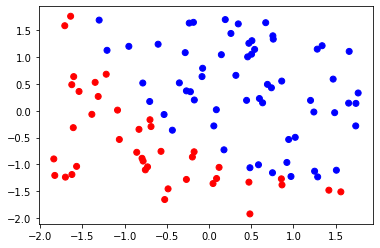

In [130]:
X = data.values[:, :2].T
y = data.values[:, 2:].T
theta = np.zeros((X.shape[0]+1, 1))
X = np.concatenate([np.ones([1, X.shape[1]]), X])
for i in range(1, X.shape[0]):
    X[i, :] = (X[i, :] - np.mean(X[i, :])) / (np.std(X[i, :]))
X.shape

colors = ['red' if val == 0 else 'blue' for val in y[0]]
plt.scatter(X[1,:], X[2,:], c=colors)

plt.show()

In [131]:
def sig(t):
  return 1/(1+np.exp(-t))

def h (x, theta):
  return sig(theta.T@x)


def compute_cost(x, y, theta):
  tx = sig(np.dot(theta.T, X))
  m = X.shape[1]
  y = np.matrix(y)

  suma = np.sum(-np.log(tx)*np.transpose(y) - np.log(1 - tx)*np.transpose(1-y))/m
  return suma


theta1 = np.zeros((X.shape[0],1))

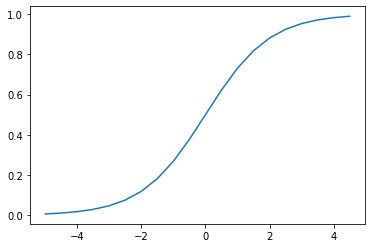

In [132]:
x_range = np.arange(-5, 5, 0.5)
plt.plot(x_range, sig(x_range))

In [133]:
def simple_gradient(X, y, theta_new, alpha, it):
  theta_temp = theta_new.copy()
  theta_new = theta_new.copy()
  for i in range (it):
    for j in range (theta_new.shape[0]):
      theta_temp[j] = theta_new[j] - (alpha/y.shape[1])*((h(X,theta_new)-y)@X[j]).sum()
    theta_new = theta_temp

  return theta_temp, compute_cost(X, y, theta_temp)


In [134]:
print(compute_cost(X,y,theta1))
alpha = 1
it = 150
th, cost = simple_gradient(X, y, theta1, alpha, it)
print("Optimal parameters:",th)
print(cost)


0.6931471805599453
Optimal parameters: [[1.42929073]
 [3.38039223]
 [3.13519745]]
0.2061943974943318


In [135]:

theta = np.zeros((X.shape[0], 1))
y = data.values[:, 2:].T
simple_gradient(X,y,theta,1,150)
tx = sig(np.dot(theta.T, X))
predic = np.where((tx < 0.5), 0, 1)
y = np.asarray(y)
y = np.concatenate(y)
predic = np.concatenate(predic)

output = accuracy_score(y, predic)
print(output)

0.6


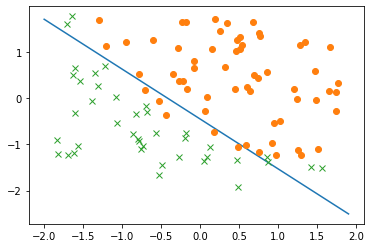

In [143]:
X = data.values[:, :2].T
y = data.values[:, 2:].T
theta = np.zeros((X.shape[0]+1, 1))

X = np.concatenate([np.ones([1, X.shape[1]]), X])
for i in range(1, X.shape[0]):
    X[i, :] = (X[i, :] - np.mean(X[i, :])) / (np.std(X[i, :]))

theta, _ = simple_gradient(X, y, theta, 1, 150)
x1 = np.arange(-2.0, 2.0, 0.1)
x2 = -theta[0, 0]/theta[2, 0] - theta[1, 0]/theta[2, 0] * x1
plt.plot(x1, x2)
X1_1 = X[1, y[0, :] == 1.0]
X2_1 = X[2, y[0, :] == 1.0]
X1_0 = X[1, y[0, :] == 0.0]
X2_0 = X[2, y[0, :] == 0.0]
plt.plot(X1_1, X2_1, 'o')
plt.plot(X1_0, X2_0, 'x')
plt.show()



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
 
iris = datasets.load_iris()
X = iris.data[:, :2]  # we are analyzing only 2 parameters
Y = iris.target

logreg = LogisticRegression(C=1)
logreg.fit(X, Y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
 
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
 
# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
 
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
 
plt.show()